<a href="https://colab.research.google.com/github/SudiptaGhosh8637/Custmer_churn_ANN/blob/new/customer_churn_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Telecom customer churn prediction



 **Project Type**    - **Classification using ANN**
##### **Contribution**    - Sudipta Ghosh

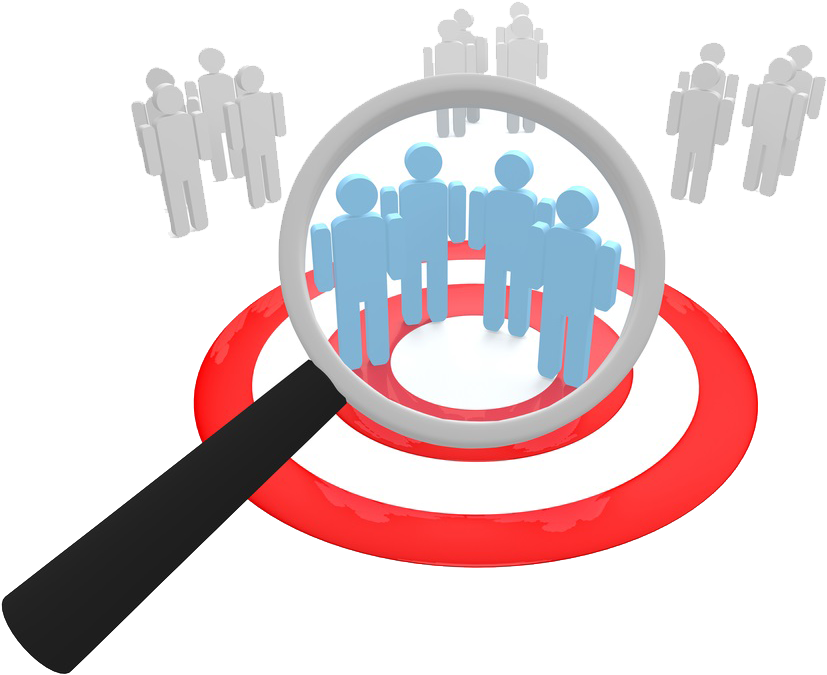

# **Project Summary -** In order to develop the customer retention program it's important to understand the biggest contributor to customer churning. We will be able to identify those features using exploratory data analysis. We will also build the model which can predict whether that customer churn or not. So based on our EDA analysis the company can design the proactive program that will avoid all those factors which leads to customer attrition and using our ML model they can periodically check whether the customer can leave or not and accordingly take measures to retain the customer.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Based on the available data for the telco customers, predict customer behavior and develop focused customer retention programs.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
telecom_df = pd.read_excel('/content/Telco-Customer-Churn.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
telecom_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"This dataset has {telecom_df.shape[0]} rows and {telecom_df.shape[1]} columns")

This dataset has 7043 rows and 21 columns


### Dataset Information

In [ ]:
# Dataset Info
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
telecom_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
telecom_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We can see that there are no missing values in the dataset.

<Axes: >

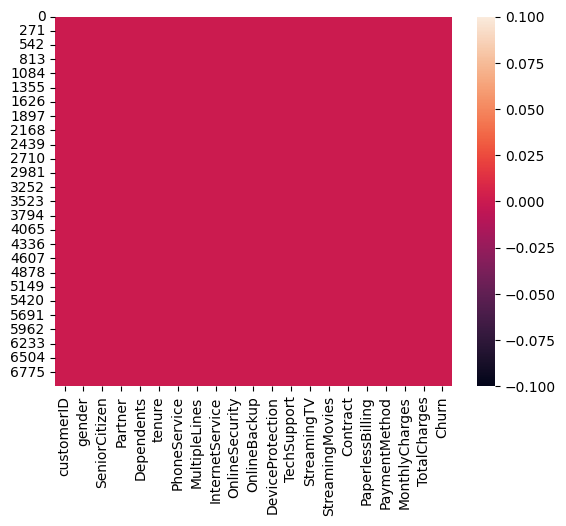

In [ ]:
# Visualizing the missing values
sns.heatmap(telecom_df.isnull())

By this heatmap we can visually see that there are no missing values.

### What did you know about your dataset?

Data set contains 7,043 customers and 21 data points on each customer.


Each row represents a customer, each column contains the customer’s attributes.


Column Churn contain the class labels value, 'Yes' means customer will churn else 'No'.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
telecom_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Dataset Describe
telecom_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Variables Description

**customerID** :	Customer ID

**gender** :	Whether the customer is a male or a female

**SeniorCitizen** :	Whether the customer is a senior citizen or not (1, 0)

**Partner** :	Whether the customer has a partner or not (Yes, No)

**Dependents** :	Whether the customer has dependents or not (Yes, No)

**tenure** :	Number of months the customer has stayed with the company

**PhoneService**	Whether the customer has a phone service or not (Yes, No)

**MultipleLines**:	Whether the customer has multiple lines or not (Yes, No, No phone service)

**InternetService**:	Customer’s internet service provider (DSL, Fiber optic, No)

**OnlineSecurity**:	Whether the customer has online security or not (Yes, No, No internet service)

**OnlineBackup**:	Whether the customer has online backup or not (Yes, No, No internet service)

**DeviceProtection**:	Whether the customer has device protection or not (Yes, No, No internet service)

**TechSupport**	Whether the customer has tech support or not (Yes, No, No internet service)

**StreamingTV**:	Whether the customer has streaming TV or not (Yes, No, No internet service)

**StreamingMovies**:	Whether the customer has streaming movies or not (Yes, No, No internet service)

**Contract**:	The contract term of the customer (Month-to-month, One year, Two year)

**PaperlessBilling**:	Whether the customer has paperless billing or not (Yes, No)

**PaymentMethod**:	The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges**:	The amount charged to the customer monthly

**TotalCharges** :	The total amount charged to the customer

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable
telecom_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Drop the customerId column
telecom_df.drop(columns='customerID',axis=1,inplace=True)
telecom_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


we observe that TotalCharges column is in object data type but it has to be in float datatype.

In [ ]:
pd.to_numeric(telecom_df['TotalCharges'],errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
telecom_df[pd.to_numeric(telecom_df['TotalCharges'],errors = 'coerce').isnull()].shape

(11, 20)

There are 11 rows with null values .we will drop those rows.

In [ ]:
# taking the rows with no missing values
df1 = telecom_df[telecom_df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [ ]:
# changing the datatype of TotalCharges
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

<ipython-input-176-97501be29619>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])


In [ ]:
# check after changing
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

We can see here that the datatype of TotalCharges column is changed to float.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='Churn'>

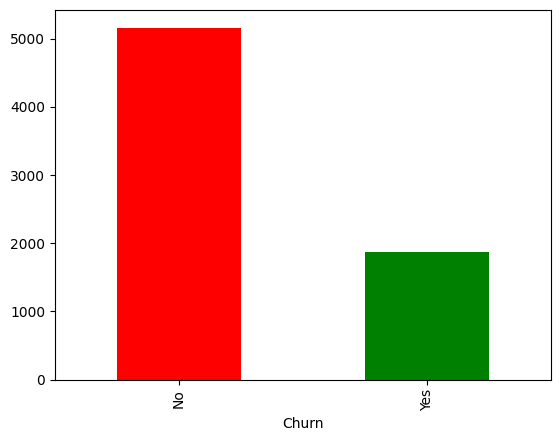

In [ ]:
# Chart - 1 visualization code
df1['Churn'].value_counts().plot(kind='bar',color=['red', 'green'])


##### 2. What is/are the insight(s) found from the chart?

As you can see we have imbalanced data, most of the data contains class label 'No' means customer will remain with the company. If out of all the available data 73.46% customers are going to stay with the company, then for any given input we can say with 73% accuracy that the customer will stay with the company. So our first objective is to get the model's accuracy more than 73%, which is better than just doing the guess work.

Note that it's extremely important to get good quality balanced data so that the model will be generalized well enough to perform better in real life scenario. In our case we have to go ahead with whatever data is available and make the best out of it.

Now let's look at the effect of other available features on the customer retention.

#### Chart - 2

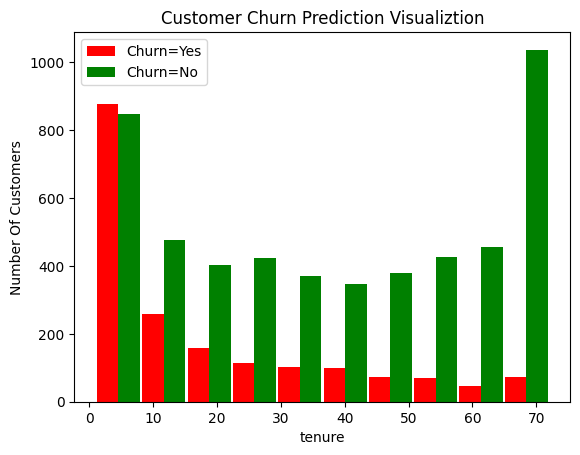

In [ ]:
# Chart - 2 visualization code
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

##### 2. What is/are the insight(s) found from the chart?

From above histogram it's clear that more number of customers tend to stay with the company after the first 10 months of service. So the company can concentrate more on the new customer and their initial experience with the service to increase the customer retention.

#### Chart - 3

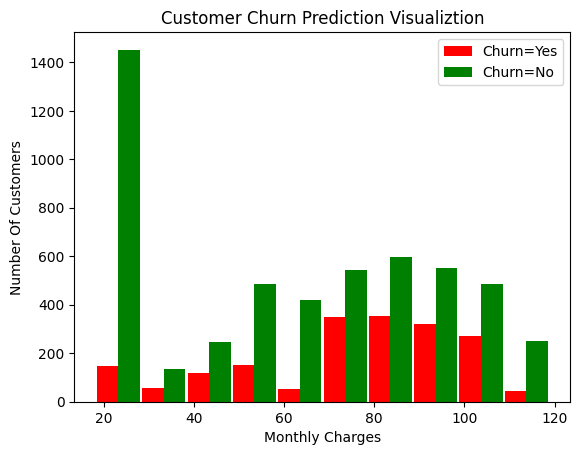

In [ ]:
# Chart - 3 visualization code
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

##### 2. What is/are the insight(s) found from the chart?

As you see from above histogram for lowest monthly rates(between 20 and 40) highest is the customer retention. But customer attrition increases for monthly charges between 70 and 100. So the company can reduce the monthly charges or add more value to the service for the same price to increase the customer retention.

#### Chart - 4

Text(0.5, 1.0, 'Effect of Gender on customer churn')

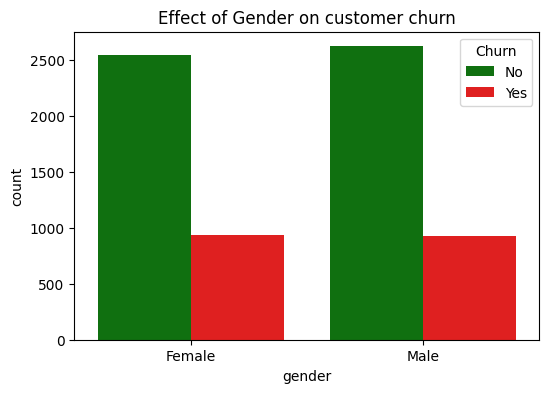

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(6,4))
ax = sns.countplot(x= 'gender', hue='Churn', data=df1,palette=['green', 'red'])
ax.set_title(f'Effect of Gender on customer churn')

##### 2. What is/are the insight(s) found from the chart?

As you can see customer gender doesn't seem to affecting churn count. Since we have separate columns for senior citizens let check the churn rate for them.

#### Chart - 5

Text(0.5, 0, 'SeniorCitizens(0: No, 1: Yes)')

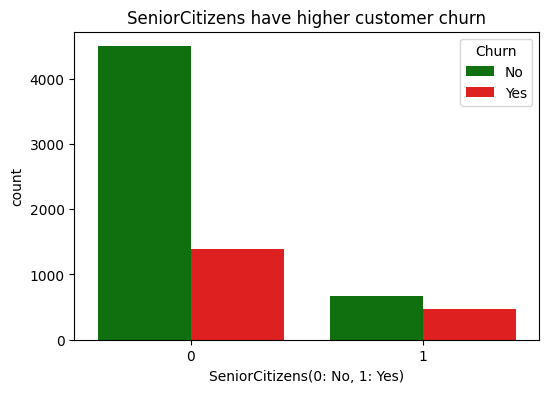

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(6,4))
ax = sns.countplot(x= 'SeniorCitizen', hue='Churn', data=df1,palette=['green', 'red'])
ax.set_title(f'SeniorCitizens have higher customer churn')
plt.xlabel('SeniorCitizens(0: No, 1: Yes)')

##### 2. What is/are the insight(s) found from the chart?

As we can see from above graph that senior citizens though being few in number have higher customer churn percentage. Now let check the effect of internet service on churn count.

#### Chart - 6

Text(0.5, 1.0, 'Effect of internet service on customer churn')

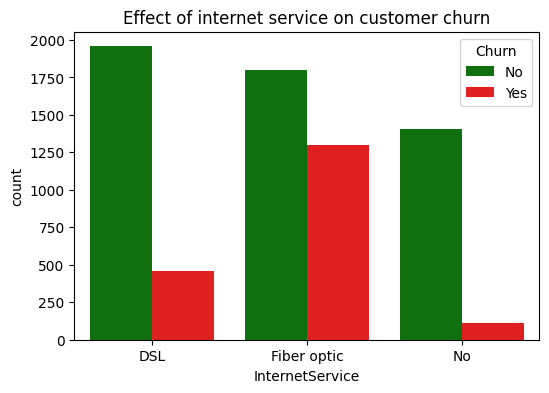

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(6,4))
ax = sns.countplot(x= 'InternetService', hue='Churn', data=df1,palette=['green', 'red'])
ax.set_title(f'Effect of internet service on customer churn')

##### 2. What is/are the insight(s) found from the chart?

As we can see from above graph that customers who are using DSL internet service tends to be more loyal as compare to fiber optic using customers. There can be many reasons for this and an accurate conclusion can be drawn by analyzing DSL and fiber optic data in detail. So my suggestion to the company is to find the shortcoming in the DSL service and keep doing what they're doing with fiber optic service. Also note that if customers are not using nay internet service then churn count reduces even further. So over all the company should have a look at the internet service offerings and try to fix bring down the shortcomings.


#### Chart - 15 - Pair Plot

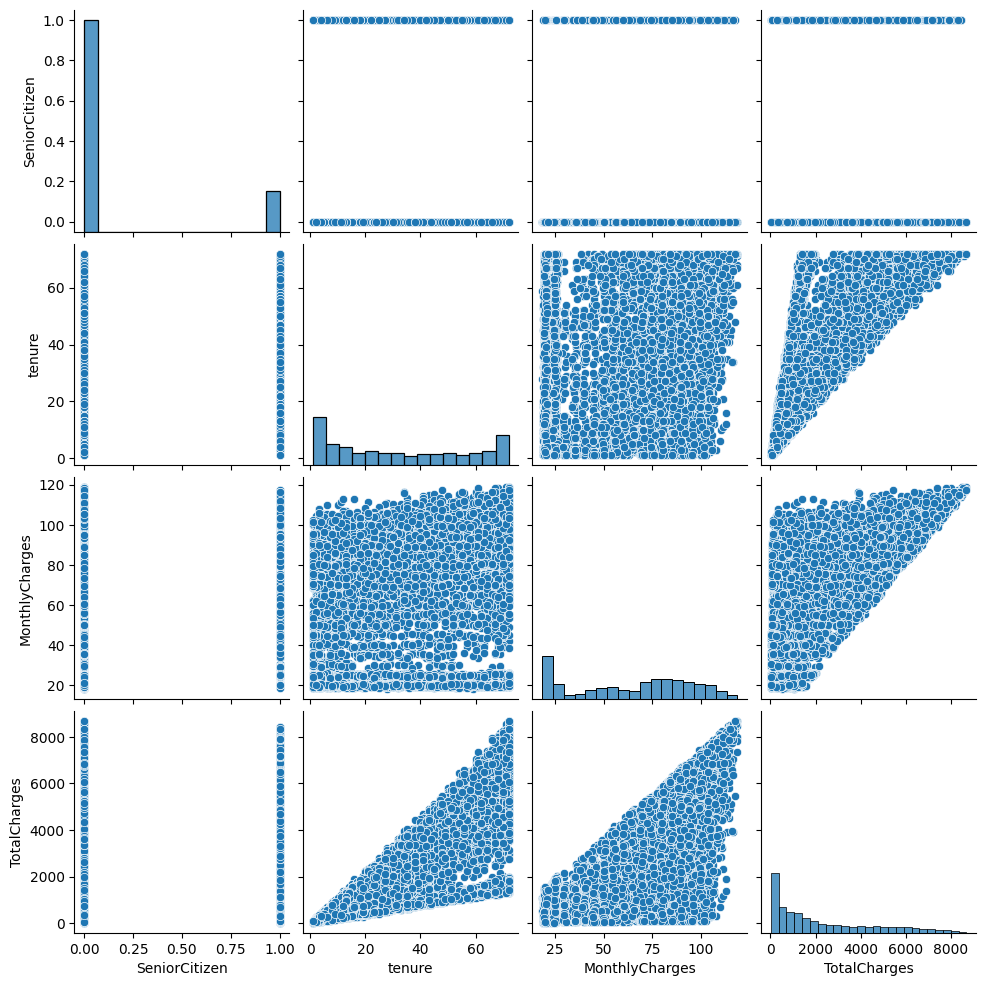

In [ ]:
# Pair Plot visualization code
sns.pairplot(df1)

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

<Axes: >

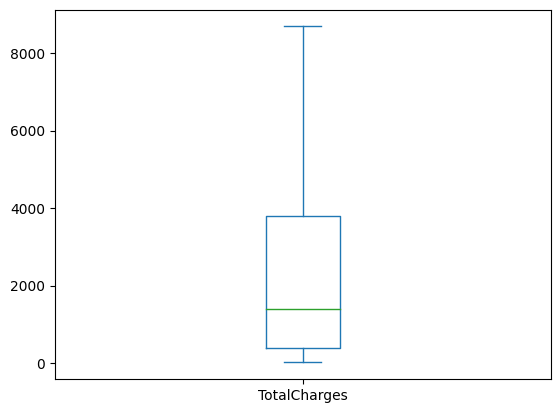

In [ ]:
# Handling Outliers & Outlier treatments
# check outliers for totalcharges column
df1['TotalCharges'].plot(kind='box')

<Axes: >

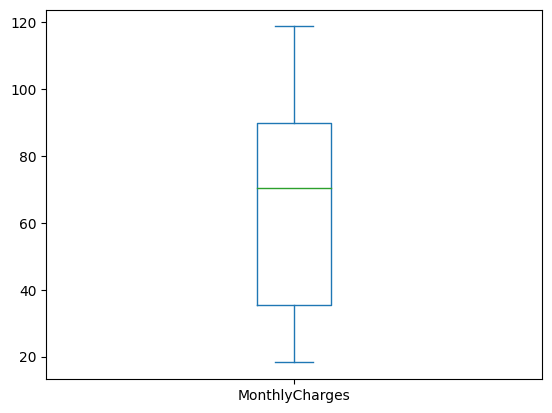

In [ ]:
# check outliers for monthlycharges  column
df1['MonthlyCharges'].plot(kind='box')

<Axes: >

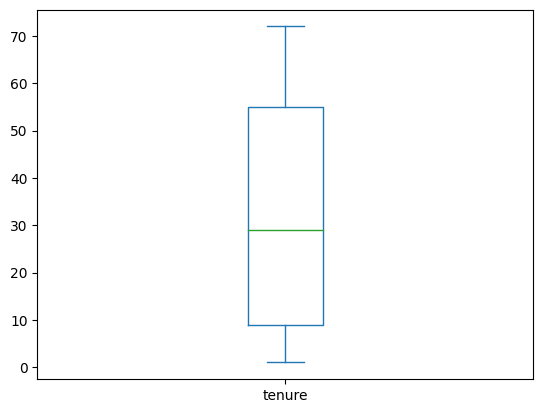

In [ ]:
# check outliers for tenure column
df1['tenure'].plot(kind='box')

As wec can see there are no outliers in this dataset.

### 3. Categorical Encoding

As you must have notice most of the columns have values 'Yes', 'No' , 'No phone service, 'No internet service' etc

We will print all the unique values for categorical columns and then replace the duplicate categories like 'No phone service' and 'No internet service' with simple 'No' category.

Once we get yes and no categories then, we will convert them into numeric format (Yes: 1, No: 0)

In [ ]:
# Encode your categorical columns
def print_unique_col_values(df1):
    """Print unique values from categorical columns of the given dataframe"""
    print('Unique values from categorical columns,\n')
    for column in df1.columns:
        if(df1[column].dtypes == 'object'):
            print(f'{column}, Unique vlaues: {df1[column].unique()}')
            print('*'*50)

print_unique_col_values(df1)

Unique values from categorical columns,

gender, Unique vlaues: ['Female' 'Male']
**************************************************
Partner, Unique vlaues: ['Yes' 'No']
**************************************************
Dependents, Unique vlaues: ['No' 'Yes']
**************************************************
PhoneService, Unique vlaues: ['No' 'Yes']
**************************************************
MultipleLines, Unique vlaues: ['No phone service' 'No' 'Yes']
**************************************************
InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
**************************************************
OnlineSecurity, Unique vlaues: ['No' 'Yes' 'No internet service']
**************************************************
OnlineBackup, Unique vlaues: ['Yes' 'No' 'No internet service']
**************************************************
DeviceProtection, Unique vlaues: ['No' 'Yes' 'No internet service']
**************************************************
TechSupport, Unique v

Now lets replace 'No phone service' with 'No' in column MultipleLines and ''No internet service' with 'no' in columns OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies. We can run this replaces, directly on the dataframe.

In [ ]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)
# Lets print unique values again
print_unique_col_values(df1)

Unique values from categorical columns,

gender, Unique vlaues: ['Female' 'Male']
**************************************************
Partner, Unique vlaues: ['Yes' 'No']
**************************************************
Dependents, Unique vlaues: ['No' 'Yes']
**************************************************
PhoneService, Unique vlaues: ['No' 'Yes']
**************************************************
MultipleLines, Unique vlaues: ['No' 'Yes']
**************************************************
InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
**************************************************
OnlineSecurity, Unique vlaues: ['No' 'Yes']
**************************************************
OnlineBackup, Unique vlaues: ['Yes' 'No']
**************************************************
DeviceProtection, Unique vlaues: ['No' 'Yes']
**************************************************
TechSupport, Unique vlaues: ['No' 'Yes']
**************************************************
StreamingTV, U

<ipython-input-189-24375ecbc6e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)
<ipython-input-189-24375ecbc6e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace = True)


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-222-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


All our categorical values don't have any numeric order or relationship between them, means these 'Nominal Categorical Values'. We should use One Hot Encoding instead of label encoding to convert them into numeric format. Since Churn contains our class labels we can manually assign numeric values to it.



In [ ]:
# Converting every column to 0 and 1 which has yes or no as values
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-223-eb24d7722099>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [ ]:
# one hot encoding for remaining categorical column
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
# converting True and False to 1 and 0 respectively
df2.replace(True,1,inplace=True)
df2.replace(False,0,inplace=True)

In [ ]:
# checking after encoding
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

Here we can see all the columns are in numeric data type.

In [ ]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


### 6. Data Scaling

In this step we are going identify the features who need to be scaled and scale them using sklearn's MinMaxScaler. Scaling is used to standardize the range of input features so that our machine learning model can quickly learn from the data. In our case features tenure, MonthlyCharges and TotalCharges need to be scaled.

In [ ]:
# Scaling your data
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale]) # Fit to data, then transform it
df2[cols_to_scale].describe()


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,0.442560,0.463166,0.261309
std,0.345708,0.299363,0.261571
min,0.000000,0.000000,0.000000
25%,0.112676,0.172512,0.044155
50%,0.394366,0.518408,0.159090
75%,0.760563,0.712562,0.435719
max,1.000000,1.000000,1.000000


As you can see now all our feature values are in the range of 0 to 1. Now let's prepare the training and testing data set for modeling.

In [ ]:
# split features and target variable
x= df2.drop('Churn',axis=1)   # Features
y=df2['Churn']                # Target

### 8. Data Splitting

We are going to create train and test datasets for training and testing respectively. Training dataset will have 80% of the data and test set will have 20% of the data.

In [ ]:
# spilt the dataset into training and testing
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=5)

Building the neural network model requires configuring the input, hidden and output layers.
Since we have 26 input features we will create first layer with 26 neurons and 'relu' activation function. Then we will add the second dense layer with 14 nodes (or neurons) and ‘relu’ activation function. Since expected output is binary, in the last layer we add only one neuron with sigmoid activation function.

We will use 'binary_crossentropy' since the expected output is binary(churn or not).

# Build Model

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)  # model train for 100 times

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4800 - accuracy: 0.7616
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.7970
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8060
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8021
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8075
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8121
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8101
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8105
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8092
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4018 - accura

In [ ]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4799 - accuracy: 0.7754


[0.47993409633636475, 0.7754086852073669]

Now lets verify the model predictions on test data

In [ ]:
predictions = model.predict(x_test)

44/44 [==============================] - 0s 1ms/step


As you can see from the results that predictions for the test data are in the form of 2D array with values ranging from 0 to 1. So in order to get in the binary format we will use threshold 0.5, anything more than 0.5 will be 1(churn-yes) else 0(churn-no)

In [ ]:
y_pred = []

for val in predictions:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Lets create a dataframe of true values and predicted values for comparison.

In [ ]:
df_true_pred = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
df_true_pred[:10]

,y_test,y_pred
2660,0,0
744,0,0
5579,1,0
64,1,1
3287,1,0
816,1,1
2670,0,0
5920,0,0
1023,0,0
6087,0,0


Check stats like precision, recall and f1-score

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       999
           1       0.62      0.57      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



From the report we can see that,

Precision(Accuracy of positive predictions), Recall(Fraction of positives that were correctly identified) and F1 score(What percent of positive predictions were correct) for 'class 0' is more than 80% and around 60% for 'class 1'.


The accuracy of the model was about 79% which is better than the 73.46%. Remember that 73.46% customer from given data do not churn.

Now let's print the confusion matrix for better visualization.

Text(95.72222222222221, 0.5, 'Truth')

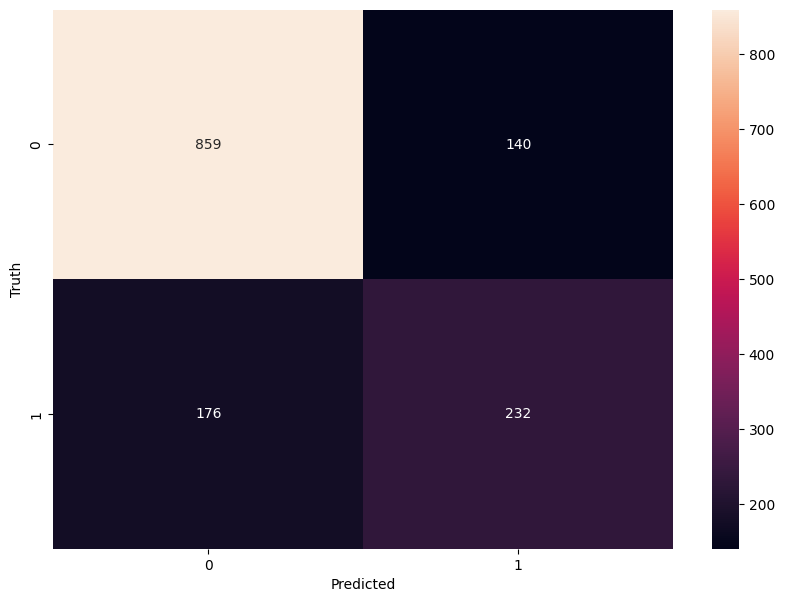

In [ ]:
# visualizing confusion matrix

cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Conclusion**

In EDA I could have gone more in detail for all the features and their effect on the customer churn. But I have only explained few major features which has the highest impact on customer attrition. Predicting customer churn is very tricky as there are so many external factors are also in play like what competition is doing and where does our product or service stand in the market. But all of these is possible to represent with data and hence good model can be built, tricky but possible!

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***